In [21]:
import numpy as np 
import pandas as pd

In [22]:
data=pd.read_csv("mallcustomerdata.csv")
data

,Customer Number(In Sequential Form),Gender of the Customer,Age of Customer,Monthly Earning of the Customer,Score From 0-10(On the Total Spending Done By Customer)
0,1,Female,47,79329,7
1,2,Female,50,90334,6
2,3,Female,27,90667,5
3,4,Male,49,183889,6
4,5,Male,59,100736,7
...,...,...,...,...,...
495,496,Male,24,119562,8
496,497,Male,55,108793,9
497,498,Male,23,69210,10
498,499,Male,38,31241,2


In [23]:
purchase = data[['Score From 0-10(On the Total Spending Done By Customer)']]

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

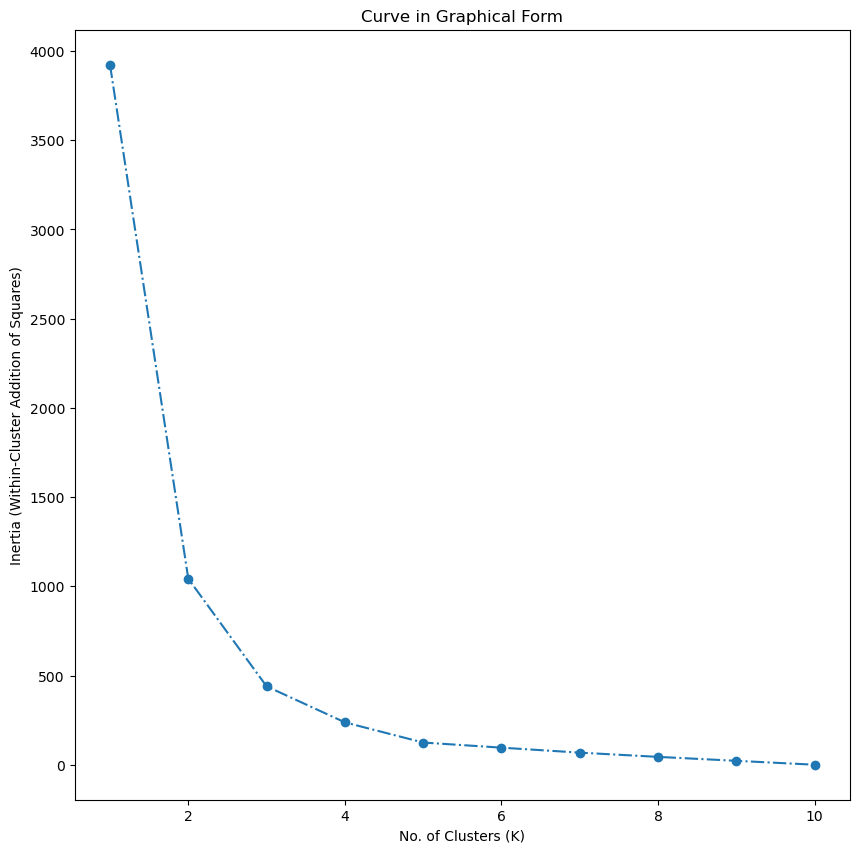

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(purchase)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), inertia, marker='o', linestyle='dashdot')
plt.title('Curve in Graphical Form')
plt.xlabel('No. of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Addition of Squares)')
plt.show()

In [25]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(purchase)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_2904\1875317880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_2904\1875317880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

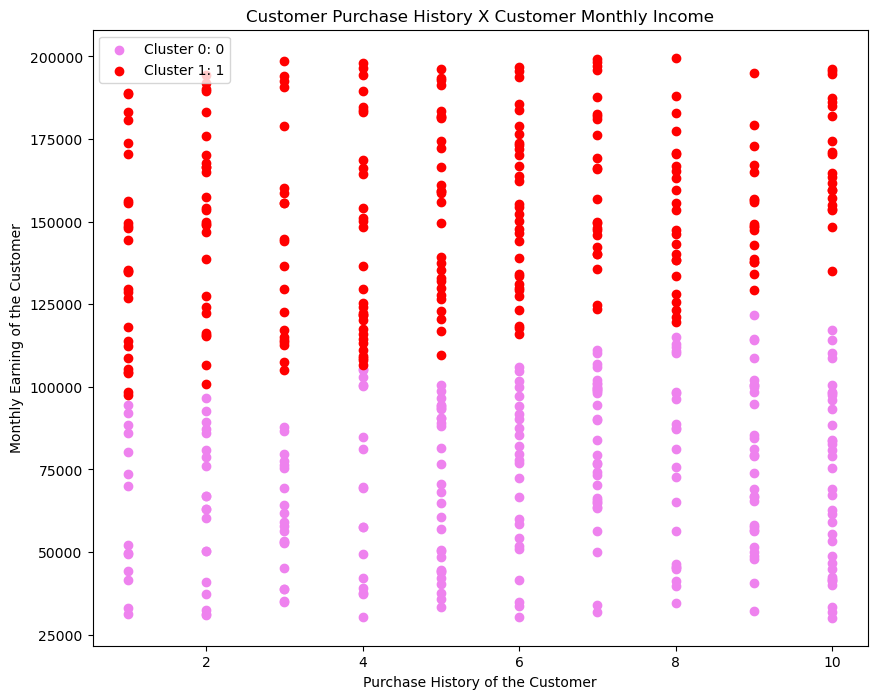

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

cluster_data = data[['Score From 0-10(On the Total Spending Done By Customer)', 'Monthly Earning of the Customer']]



scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

cluster_data['Cluster Name'] = cluster_data['Cluster']
    
plt.figure(figsize=(10, 8))
colors = [ 'violet', 'red']
for i, cluster in enumerate(cluster_data['Cluster'].unique()):
    subset = cluster_data[cluster_data['Cluster'] == cluster]
    plt.scatter(subset['Score From 0-10(On the Total Spending Done By Customer)'], subset['Monthly Earning of the Customer'], label=f'Cluster {cluster}: {subset["Cluster Name"].iloc[0]}', color=colors[i])

plt.xlabel('Purchase History of the Customer')
plt.ylabel('Monthly Earning of the Customer')
plt.legend()
plt.title('Customer Purchase History X Customer Monthly Income')
plt.show()